In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. bottom: 0.2813
	2. up: 0.2679
	3. round: 0.2311
	4. three: 0.2112
	5. angle: 0.2040
	6. green: 0.1421
	7. blue: 0.1370
	8. red: 0.1111
	9. canvas: 0.0980
	10. color: 0.0969

Top-n images with largest absolute values of logits:


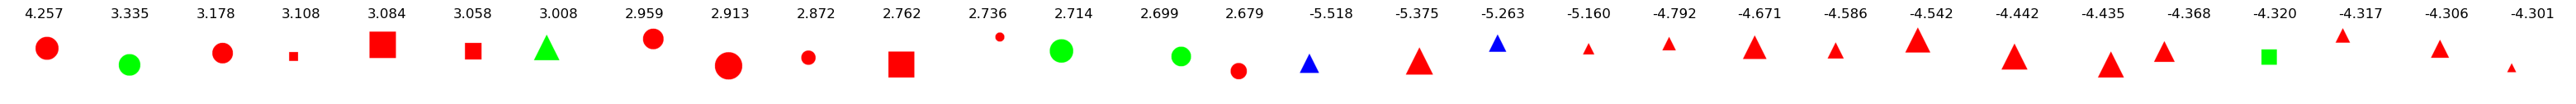

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. green: 0.4781
	2. red: 0.3462
	3. four: 0.3023
	4. <pad>: 0.2572
	5. angle: 0.1191
	6. position: 0.1028
	7. rotate: 0.0723
	8. round: 0.0700
	9. has: 0.0661
	10. white: 0.0528

Top-n images with largest absolute values of logits:


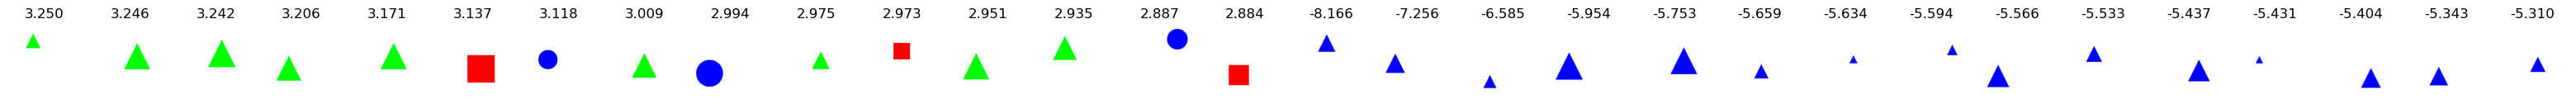

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. four: 0.6202
	2. red: 0.4470
	3. <pad>: 0.4070
	4. has: 0.1012
	5. white: 0.0785
	6. canvas: 0.0645
	7. green: 0.0634
	8. blue: 0.0608
	9. blank: 0.0606
	10. angle: 0.0556

Top-n images with largest absolute values of logits:


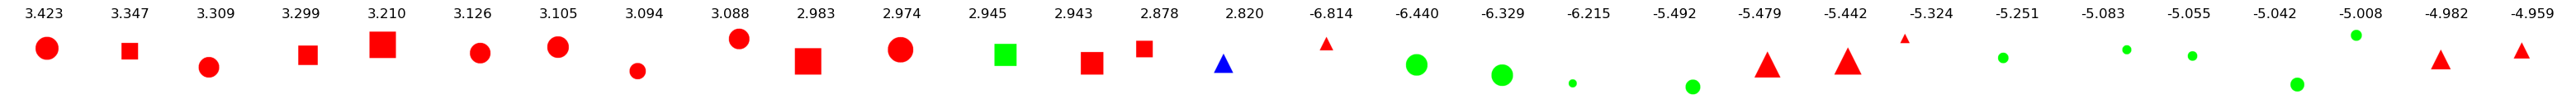

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. four: 0.4370
	2. blue: 0.4143
	3. <pad>: 0.2949
	4. green: 0.1503
	5. canvas: 0.1329
	6. has: 0.1229
	7. red: 0.0955
	8. angle: 0.0831
	9. rotate: 0.0683
	10. up: 0.0451

Top-n images with largest absolute values of logits:


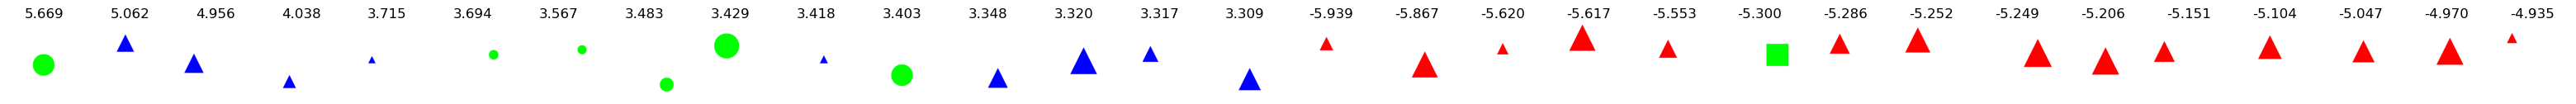

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. red: 0.3904
	2. <pad>: 0.3539
	3. three: 0.3278
	4. four: 0.1761
	5. blue: 0.1620
	6. angle: 0.1252
	7. round: 0.1164
	8. color: 0.0723
	9. rotate: 0.0716
	10. canvas: 0.0621

Top-n images with largest absolute values of logits:


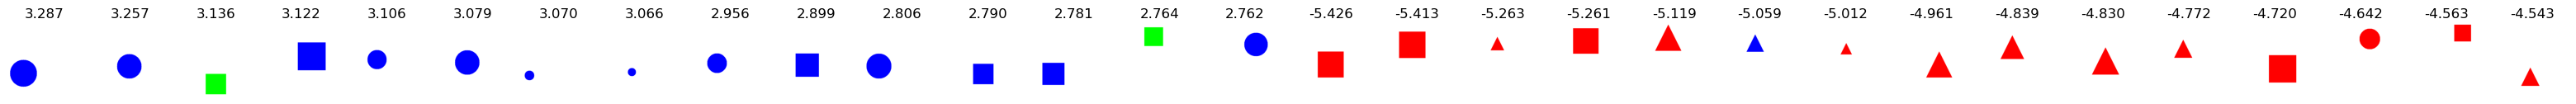

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. green: 0.4254
	2. <pad>: 0.1940
	3. four: 0.1818
	4. red: 0.1817
	5. blue: 0.1274
	6. canvas: 0.1230
	7. right: 0.1100
	8. left: 0.1001
	9. round: 0.0985
	10. has: 0.0925

Top-n images with largest absolute values of logits:


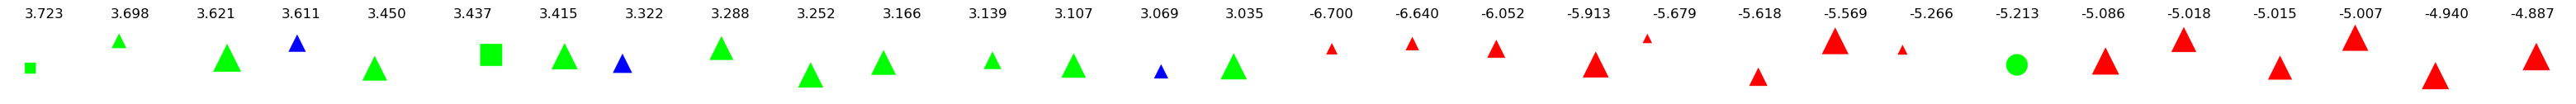

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. blue: 0.4049
	2. red: 0.3807
	3. four: 0.3509
	4. three: 0.2758
	5. <pad>: 0.2287
	6. color: 0.1158
	7. up: 0.0919
	8. bottom: 0.0834
	9. round: 0.0619
	10. canvas: 0.0606

Top-n images with largest absolute values of logits:


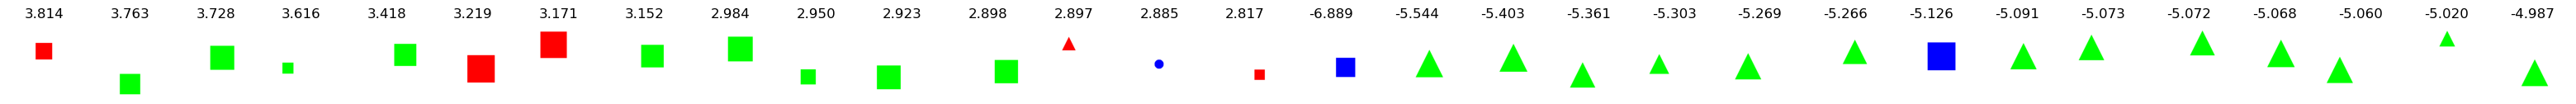

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. angle: 0.5470
	2. four: 0.4845
	3. <pad>: 0.2985
	4. red: 0.1507
	5. blue: 0.1470
	6. green: 0.0977
	7. round: 0.0940
	8. has: 0.0476
	9. position: 0.0422
	10. rotate: 0.0305

Top-n images with largest absolute values of logits:


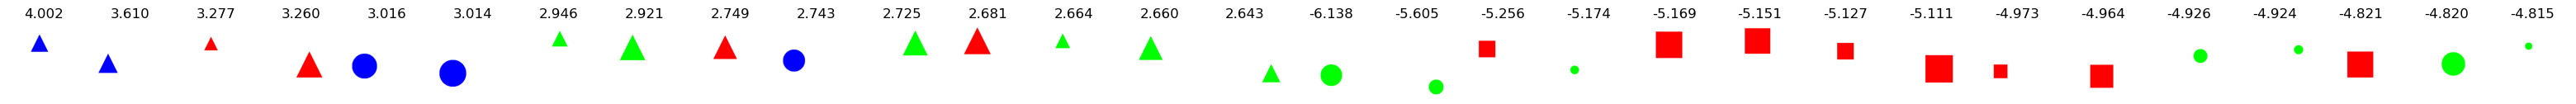

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. blue: 0.3393
	2. three: 0.3154
	3. <pad>: 0.3107
	4. green: 0.2816
	5. angle: 0.1379
	6. four: 0.1373
	7. round: 0.0950
	8. rotate: 0.0891
	9. blank: 0.0731
	10. color: 0.0659

Top-n images with largest absolute values of logits:


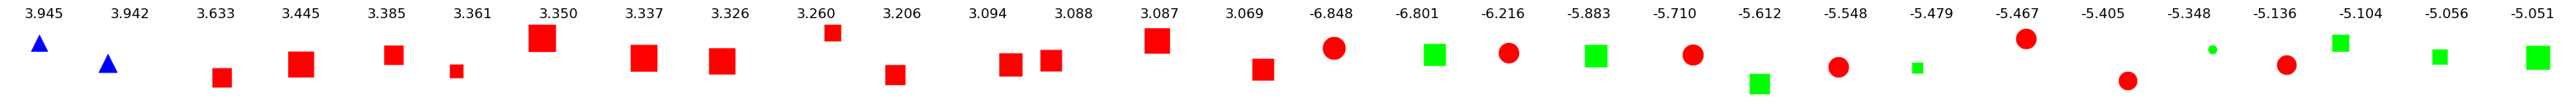

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. three: 0.4346
	2. red: 0.3887
	3. <pad>: 0.3874
	4. blue: 0.2288
	5. canvas: 0.1207
	6. four: 0.0990
	7. has: 0.0809
	8. green: 0.0781
	9. rotate: 0.0750
	10. round: 0.0679

Top-n images with largest absolute values of logits:


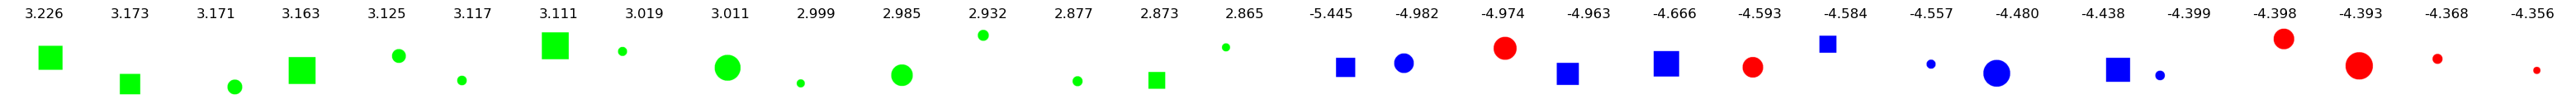

----------------------------------------------------------------------------------------------------


In [5]:
for i in range(10):
    visualize_concept(i)